# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
from keras.metrics import Precision, Recall, AUC

from sklearn.svm import SVC

In [2]:
df = pd.read_csv('malware_data\drebin-215-dataset-5560malware-9476-benign.csv')
df.head(100)

C:\Users\fredd\AppData\Local\Temp\ipykernel_20948\3716872598.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('malware_data\drebin-215-dataset-5560malware-9476-benign.csv')


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,S
96,0,1,1,0,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,S
97,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,S
98,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,0,0,0,S


In [3]:
df.dropna(axis=0, inplace=True)

In [4]:
df['TelephonyManager.getSimCountryIso'] = df['TelephonyManager.getSimCountryIso'].astype(str)

In [5]:
label_encoder = LabelEncoder()

columns_to_encode = ['class', 'TelephonyManager.getSimCountryIso']

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])
    df[col] = df[col].astype('float64')


In [6]:
print(df['class'].unique())

[1. 0.]


In [7]:
X = df.drop(columns='class')
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [8]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(215,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='softmax'))
    return model

model = create_model()

C:\Users\fredd\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/10


C:\Users\fredd\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


45/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3666 - auc: 0.5000 - loss: 0.5707 - precision: 0.3666 - recall: 1.0000

C:\Users\fredd\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3666 - auc: 0.5000 - loss: 0.5558 - precision: 0.3666 - recall: 1.0000 - val_accuracy: 0.3807 - val_auc: 0.5000 - val_loss: 0.1065 - val_precision: 0.3807 - val_recall: 1.0000
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3605 - auc: 0.5000 - loss: 0.0839 - precision: 0.3605 - recall: 1.0000 - val_accuracy: 0.3807 - val_auc: 0.5000 - val_loss: 0.0694 - val_precision: 0.3807 - val_recall: 1.0000
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3644 - auc: 0.5000 - loss: 0.0564 - precision: 0.3644 - recall: 1.0000 - val_accuracy: 0.3807 - val_auc: 0.5000 - val_loss: 0.0607 - val_precision: 0.3807 - val_recall: 1.0000
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3691 - auc: 0.5000 - loss: 0.0371 - precision: 0.3691 - recall: 1.0000 - val_accuracy: 0.3807 - val_auc: 0.5000 - val_loss: 0.0571 - val_precision: 0.3807 - val_recall: 1.0000
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [10]:
total_results = []
results = model.evaluate(X_test, y_test)
results = results[1:]
total_results.append(results)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3839 - auc: 0.5000 - loss: 0.0713 - precision: 0.3839 - recall: 1.0000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1863
         1.0       0.38      1.00      0.55      1145

    accuracy                           0.38      3008
   macro avg       0.19      0.50      0.28      3008
weighted avg       0.14      0.38      0.21      3008



C:\Users\fredd\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anacond

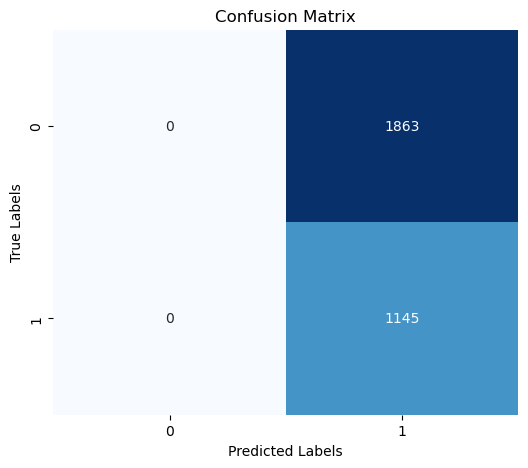

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

In [13]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

metrics = {
    'accuracy': accuracy,
    'precision': report_df['precision'].mean(),
    'recall': report_df['recall'].mean(),  
    'f1_score': report_df['f1-score'].mean() 
}

results = [metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1_score']]
total_results.append(results)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1863
         1.0       0.99      0.98      0.99      1145

    accuracy                           0.99      3008
   macro avg       0.99      0.99      0.99      3008
weighted avg       0.99      0.99      0.99      3008



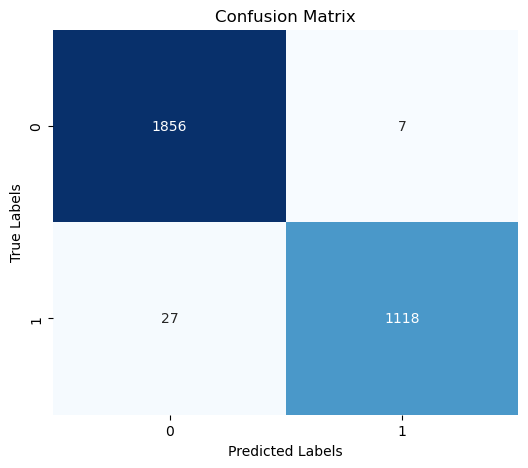

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

In [15]:
model = Sequential()
model.add(GRU(units=50, return_sequences=False, input_shape=(215,1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', Precision(), Recall(), AUC()])
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10


C:\Users\fredd\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.6274 - auc_1: 0.4929 - loss: 0.2684 - precision_1: 0.3779 - recall_1: 0.0094 - val_accuracy: 0.6193 - val_auc_1: 0.4881 - val_loss: 0.2362 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.6299 - auc_1: 0.5027 - loss: 0.2330 - precision_1: 0.0420 - recall_1: 1.4202e-04 - val_accuracy: 0.6220 - val_auc_1: 0.5119 - val_loss: 0.2358 - val_precision_1: 0.7500 - val_recall_1: 0.0105
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.6274 - auc_1: 0.5087 - loss: 0.2336 - precision_1: 0.2882 - recall_1: 0.0014 - val_accuracy: 0.6193 - val_auc_1: 0.5021 - val_loss: 0.2374 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.6378 - auc_1: 0.4893 - loss: 0.2315 - precision_1: 0.4908 - recall_1: 0.0019 - val_accuracy: 0.6200 - val_auc_1: 0.5147 - val_loss: 0.2371 - val_precision_1: 0

In [16]:
results = model.evaluate(X_test, y_test)
results = results[1:]
total_results.append(results)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6172 - auc_1: 0.5002 - loss: 0.2367 - precision_1: 0.6234 - recall_1: 0.0091
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77      1863
         1.0       0.73      0.01      0.02      1145

    accuracy                           0.62      3008
   macro avg       0.68      0.50      0.39      3008
weighted avg       0.66      0.62      0.48      3008



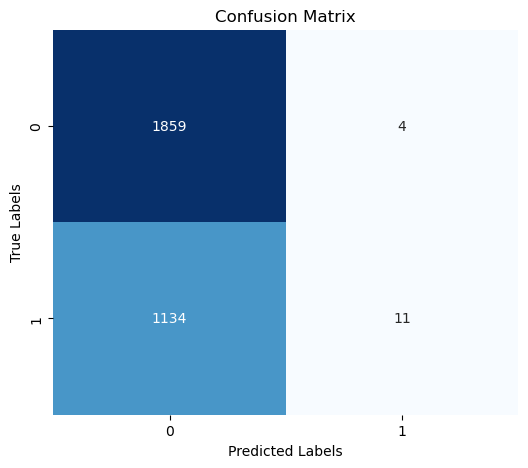

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

In [19]:
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

metrics = {
    'accuracy': accuracy,
    'precision': report_df['precision'].mean(), 
    'recall': report_df['recall'].mean(), 
    'f1_score': report_df['f1-score'].mean()  
}

results = [metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1_score']]
total_results.append(results)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1863
         1.0       0.99      0.96      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



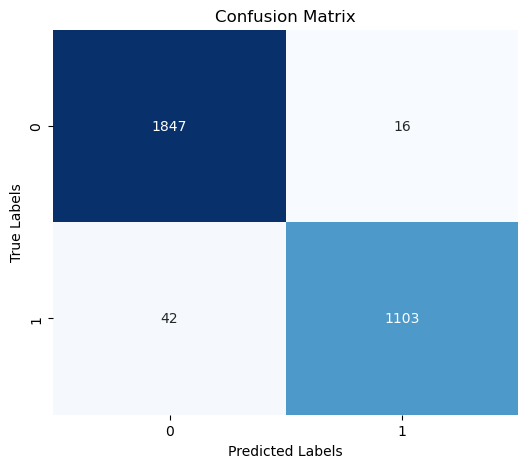

In [21]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

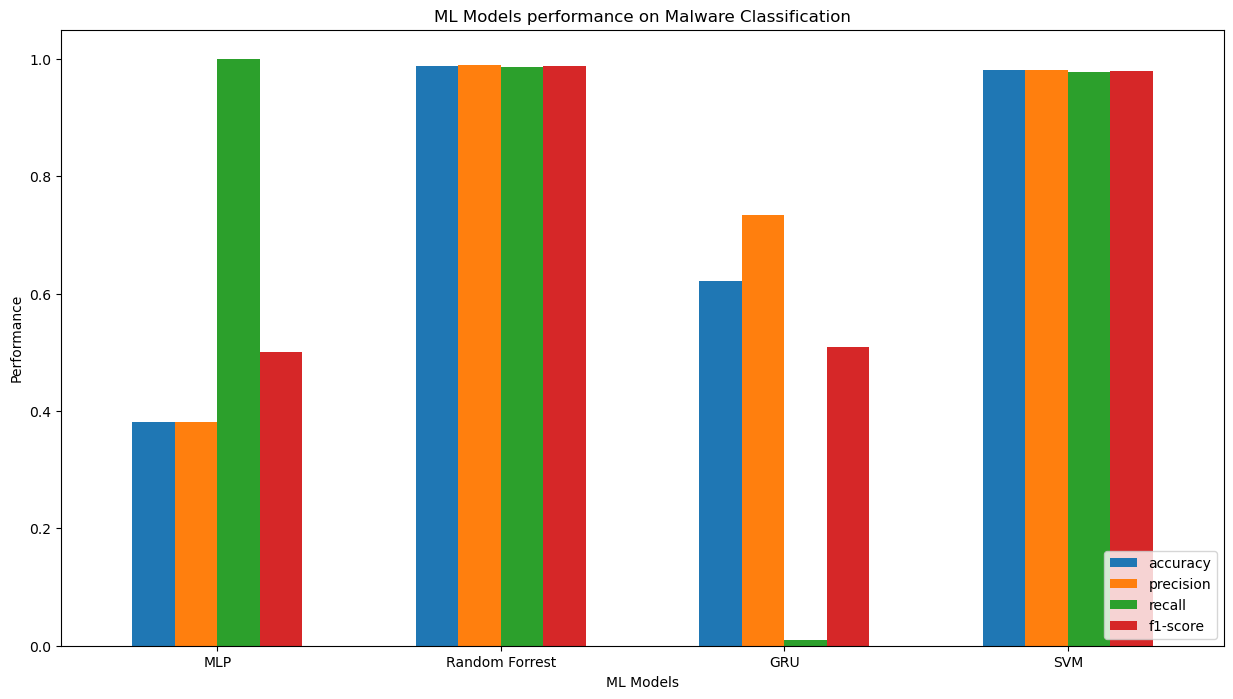

In [22]:
total_results = pd.DataFrame(total_results)

total_results.index = ['MLP', 'Random Forrest', 'GRU', 'SVM']
total_results.rename(columns={0:'accuracy', 1:'precision', 2:'recall', 3:'f1-score'}, inplace=True)


total_results.plot(kind='bar', figsize=(15,8), width=0.6)
plt.title('ML Models performance on Malware Classification')
plt.ylabel('Performance')
plt.xlabel('ML Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

**Lab Logbook requirement**: Provide a graph comparing the performance of the AI model that you have developed.